# Spectral Filtering: Butterworth Notch Filter

Dai'zjon Carney


A notch filter suppresses specific frequencies. Letting $d_0$ denote the notch frequency cut-off distance (-3dB), and $d^+_{uv}$ and $d^-_{uv}$ the Euclidian distances from $(u,v)$ to the two notches $(u_0,v_0)$ and $(-u_0,-v_0)$, i.e., $d^+_{uv} = \sqrt{(u-u_0)^2+(v-v_0)^2}$ and $d^-_{uv} = \sqrt{(u+u_0)^2+(v+v_0)^2}$,
we can define the notch filter transfer function as the product of two shifted $n$-order high-pass filters.
That is,

$$H_{N}(u,v) = H^+_{N}(u,v)\; H^-_{N}(u,v)$$

$$H^+_{N}(u,v) = \dfrac{1}{\sqrt{1 + \left( d_0\,/\,d^+_{uv} \right)^{2n}}}, \quad
  H^-_{N}(u,v) = \dfrac{1}{\sqrt{1 + \left( d_0\,/\,d^-_{uv} \right)^{2n}}}.$$

Multiple frequencies can be rejected by multiplying the corresponding transfer functions. We will not consider that here. NOTE: The above will produce divide-by-zero. A simple work-around is to add 1.0e-6 or some other small number to the distances. We may also experience a run-time warning complaining about overflow if you raise a small value to a high power. Options include ignoring the warning, reduce the epsilon value or the filter order.

Copied the 2D Butterworth code from its module. Replaced the bwLP, bwHP, bwBP, and bwBS filters with a notch filter called bwN that takes six arguments, namely, d0, u0, v0, n, M, N. Applied the notch filter to the zebra image after it has been corrupted by a 2D sinewave. Tried different 2D frequencies to see the results. Set up to work for any 2D frequency to be tested. Code displayed the corrupted and filtered images as well as their respective frequency spectra. Applied a log-transformation to the latter to make the content visible.

In [1]:
# load packages
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io

from scipy.fft import fft2, ifft2, fftshift

from skimage.util import img_as_float32 as img_as_float

In [2]:
# image/plot display function
def show_images(I, titles=None):
    fig, ax = plt.subplots(1, len(I), figsize=(12,5))        
 
    for i in np.arange(0,len(I)):
        ax[i].imshow(I[i], cmap='gray')
        ax[i].set_axis_off()
        if titles != None:
            ax[i].set_title(titles[i])
        
    plt.tight_layout()
    
def show_plots(I, titles=None):
    fig, ax = plt.subplots(1, len(I), figsize=(12,1))
 
    for i in np.arange(0,len(I)):
        if titles != None:
            ax[i].set_title(titles[i])
        
        r = I[i].shape[0]//2
        ax[i].plot(I[i][r,:])
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
    plt.tight_layout()

In [3]:
# notch filter: bwN
def bwN(d0, u0, v0, n, M, N=None):
    if N == None:
        N = M
    u, v = np.meshgrid(np.arange(-N//2, N//2), np.arange(-M//2, M//2))
    D = np.sqrt((u-u0)**2 + (v-v0)**2)
    H = 1 / (1 + (D**n / d0**n))
    return H

## Notch Filter Application

In [5]:
# nextpow2 function
def nextpow2(N):
    n = 1
    while (n<N):
        n *= 2
    return n

In [6]:
# sinewave function
def sinewaves(M, N, ku, kv):
    T = 2.0*np.pi
    
    KM, KN = (M//2, N//2)
    u, v = np.mgrid[-KM:KM,-KN:KN]
    
    I = np.sin(T*(u*ku/M+v*kv/N))
    
    return I


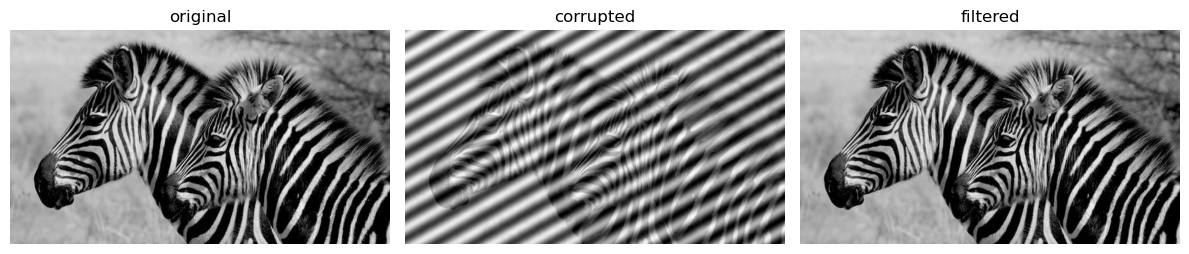

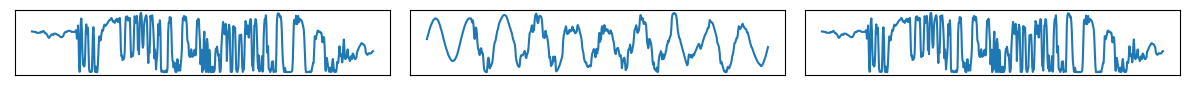

In [ ]:
# read zebras.jpg 
I1 = io.imread("zebras.jpg", as_gray=True)
I1 = img_as_float(I1)
M, N = I1.shape

# add 2D sinewave pattern
sine_wave = sinewaves(M, N, 10, 10) # generates sinewave freq 10
corrupted = I1 + sine_wave #corrupts image by sinewave

# apply fft
N2 = np.max([nextpow2(N), nextpow2(M)]) # Determine the appropriate length for the input data
F1 = fft2(I1,(N2,N2))

# apply notch filter
notched = F1 * bwN(50, 200, 200, 0, N2, N2)

# apply inverse fft
filtered = np.real(ifft2(notched))[:M,:N]

# display images and their spectra
show_images([I1, corrupted, filtered],
            ['original','corrupted','filtered'])
show_plots([I1, corrupted, filtered])